In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import os

In [3]:
os.getcwd()

'C:\\Users\\sabin\\Data_science_projects'

In [4]:
for root, dirs, files in os.walk('C:\\Users\\sabin\\Data_science_projects\\hamnspam'):
    for name in files:
        #print(os.path.join(root, name))
        os.path.join(root, name)

In [5]:
print("size of spam data:", len(os.listdir('C:\\Users\\sabin\\Data_science_projects\\hamnspam\\spam')))
print("size of ham data:", len(os.listdir('C:\\Users\\sabin\\Data_science_projects\\hamnspam\\ham')))

size of spam data: 501
size of ham data: 2551


# Preparing the raw data and converting into DataFrame format.

In [6]:
path = ('C:\\Users\\sabin\\Data_science_projects\\hamnspam\\')
mails = []
labels = []

for label in ["ham\\","spam\\"]:
    filenames = os.listdir(path+label) #for ham files first
    
    for file in filenames:
        f = open((path + label + file),'r',encoding = 'latin-1')
        f_read = f.read()
        mails.append(f_read)
        labels.append(label)
df = pd.DataFrame({'emails': mails, 'labels': labels})
    

In [7]:
df.describe()

,emails,labels
count,3052,3052
unique,3047,2
top,Received: from qrq.cc.ntu.edu.tw (giga.tw.free...,ham\
freq,2,2551


In [27]:
mails[2000]


"From rssfeeds@jmason.org  Wed Sep 25 10:24:01 2002\nReturn-Path: <rssfeeds@example.com>\nDelivered-To: yyyy@localhost.example.com\nReceived: from localhost (jalapeno [127.0.0.1])\n\tby jmason.org (Postfix) with ESMTP id 5081716F16\n\tfor <jm@localhost>; Wed, 25 Sep 2002 10:24:01 +0100 (IST)\nReceived: from jalapeno [127.0.0.1]\n\tby localhost with IMAP (fetchmail-5.9.0)\n\tfor jm@localhost (single-drop); Wed, 25 Sep 2002 10:24:01 +0100 (IST)\nReceived: from dogma.slashnull.org (localhost [127.0.0.1]) by\n    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g8P83iC18351 for\n    <jm@jmason.org>; Wed, 25 Sep 2002 09:03:44 +0100\nMessage-Id: <200209250803.g8P83iC18351@dogma.slashnull.org>\nTo: yyyy@example.com\nFrom: boingboing <rssfeeds@example.com>\nSubject: Flying cars here, jetpacks next?\nDate: Wed, 25 Sep 2002 08:03:44 -0000\nContent-Type: text/plain; encoding=utf-8\nX-Spam-Status: No, hits=0.0 required=5.0\n\ttests=AWL\n\tversion=2.50-cvs\nX-Spam-Level: \n\nURL: http://boingboing

In [31]:
labels[2]

'ham\\'

In [32]:
df

,emails,labels
0,From exmh-workers-admin@redhat.com Thu Aug 22...,ham\
1,From Steve_Burt@cursor-system.com Thu Aug 22 ...,ham\
2,From timc@2ubh.com Thu Aug 22 13:52:59 2002\n...,ham\
3,From irregulars-admin@tb.tf Thu Aug 22 14:23:...,ham\
4,From exmh-users-admin@redhat.com Thu Aug 22 1...,ham\
...,...,...
3047,From biz2biz2446@Flashmail.com Mon Oct 7 22:...,spam\
3048,From cna@insiq.us Tue Oct 8 00:10:39 2002\nR...,spam\
3049,From bounce2@u-answer.com Tue Oct 8 11:02:30...,spam\
3050,From beautyinfufuxxxmeb13mxy@aol.com Tue Oct ...,spam\


## converting ham/ and spam/ to 0 and 1.

In [8]:
#simple way is by mapping
df['labels'] = df['labels'].map({'ham\\': 0, 'spam\\':1})

## can also use 

#from sklearn.preprocessing import LabelEncoder
#encoder = LabelEncoder()
#df['labels'] = encoder.fit_transform(df['labels'])

## this will encode labels with some number and useful to encode for 
## multiple labeling instead of mapping manually

In [7]:
df.head()

,emails,labels
0,From exmh-workers-admin@redhat.com Thu Aug 22...,0
1,From Steve_Burt@cursor-system.com Thu Aug 22 ...,0
2,From timc@2ubh.com Thu Aug 22 13:52:59 2002\n...,0
3,From irregulars-admin@tb.tf Thu Aug 22 14:23:...,0
4,From exmh-users-admin@redhat.com Thu Aug 22 1...,0


In [35]:
df['labels'][3051] 

1

### check for null values

In [8]:
df.isna().sum() # no null values, is good to work

emails    0
labels    0
dtype: int64

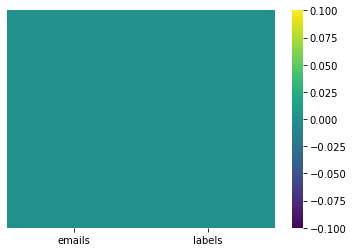

In [9]:
#visualization using seaborn heatmap
sns.heatmap(df.isna(),yticklabels=False,cmap='viridis')
#blank means no NaN values

### converting the emails msg into lower case

In [9]:
df['emails'] = df['emails'].apply(lambda x:x.lower())
## passing emails as parameter to return lower case texts

In [11]:
df

,emails,labels
0,from exmh-workers-admin@redhat.com thu aug 22...,0
1,from steve_burt@cursor-system.com thu aug 22 ...,0
2,from timc@2ubh.com thu aug 22 13:52:59 2002\n...,0
3,from irregulars-admin@tb.tf thu aug 22 14:23:...,0
4,from exmh-users-admin@redhat.com thu aug 22 1...,0
...,...,...
3047,from biz2biz2446@flashmail.com mon oct 7 22:...,1
3048,from cna@insiq.us tue oct 8 00:10:39 2002\nr...,1
3049,from bounce2@u-answer.com tue oct 8 11:02:30...,1
3050,from beautyinfufuxxxmeb13mxy@aol.com tue oct ...,1


In [10]:
## Replacing '\n' and '\t' with '' for data cleaning 
df['emails'] = df['emails'].apply(lambda x: x.replace('\n',''))
df['emails'] = df['emails'].apply(lambda x: x.replace('\t',''))

In [13]:
df

,emails,labels
0,from exmh-workers-admin@redhat.com thu aug 22...,0
1,from steve_burt@cursor-system.com thu aug 22 ...,0
2,from timc@2ubh.com thu aug 22 13:52:59 2002re...,0
3,from irregulars-admin@tb.tf thu aug 22 14:23:...,0
4,from exmh-users-admin@redhat.com thu aug 22 1...,0
...,...,...
3047,from biz2biz2446@flashmail.com mon oct 7 22:...,1
3048,from cna@insiq.us tue oct 8 00:10:39 2002ret...,1
3049,from bounce2@u-answer.com tue oct 8 11:02:30...,1
3050,from beautyinfufuxxxmeb13mxy@aol.com tue oct ...,1


##  Natural Language ToolKit

In [11]:
import nltk
import re #regular expression
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [12]:
ps = PorterStemmer()

In [13]:
corpus=[] #processed data is stored here

* Removing special chars & numbers
* stemming 

In [14]:
# running this takes quite a long time
# depending on the machine resources
for index in range(len(df)):
    review_mail = re.sub('[^a-zA-Z]',' ', df['emails'][index]) # returns string
    mail_list = review_mail.split() # returns a list
    stem_mail = [ps.stem(word) for word in mail_list if word not in stopwords.words('english')]
    new_mail = ' '.join(mail_list)
    corpus.append(new_mail)

 ### Bagging word using CountVectorization
 can try using TF-IDF which gives better result

In [15]:
# tokenizing each words using countvectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 2500)
X = cv.fit_transform(corpus).toarray() #transforming to array
y = df['labels']


## Splitting the Data

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [18]:
from sklearn.naive_bayes import MultinomialNB # better in word counting than GNB
model = MultinomialNB()

In [19]:
X_train.shape

(2441, 2500)

In [20]:
y_train.shape

(2441,)

In [21]:
model.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [22]:
y_pred = model.predict(X_test)

## Checking Accuracy

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
accuracy = accuracy_score(y_test, y_pred)

In [25]:
accuracy

0.983633387888707

### checking confusion matrix

In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
cm = confusion_matrix(y_test, y_pred)

In [28]:
cm

array([[516,   3],
       [  7,  85]], dtype=int64)

In [29]:
data = pd.DataFrame(cm)

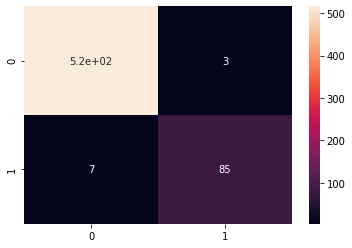

In [31]:
sns.heatmap(data,annot=True)

### Therefore, confusion matrix shows the prediction is good.
* 3 times falsely predicted as ham
* 7 times falsely predicted as spam